In [ ]:
#import statements listed below
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import scipy
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!jupyter nbconvert --to html ''

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/CSI5810-HW2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Ju

In [ ]:
#1 a:
covarience_matrix_a = np.array(np.mat('5 .8 -.3; .8 3 .6; -.3 .6 4')) #Input the covarience matrix given in 1 a
matrix_a = np.random.multivariate_normal([1,2,1], covarience_matrix_a, size = 300) #generate the random normal distribution that is size 300 and mean vector of [1,2,1].t

print(matrix_a.shape)

#print statements
print("covarience Matrix input : \n", covarience_matrix_a)
print("matrix Generated: \n", matrix_a)

(300, 3)
covarience Matrix input : 
 [[ 5.   0.8 -0.3]
 [ 0.8  3.   0.6]
 [-0.3  0.6  4. ]]
matrix Generated: 
 [[-1.02209688e+00  4.15619963e+00  4.85645827e+00]
 [-1.10964232e+00  1.07395093e+00  1.84139398e+00]
 [ 1.28251020e+00  3.11079451e+00  1.20442518e+00]
 [ 2.20415617e+00  2.33529752e+00 -4.69739520e+00]
 [ 1.82758051e+00  2.91044679e+00 -2.53428458e+00]
 [ 2.71815780e+00  5.69701556e+00  2.96056752e+00]
 [-1.71956718e+00 -1.24907210e+00  3.30723788e+00]
 [ 5.43754911e+00  2.83384204e+00  1.17048948e+00]
 [ 2.89574204e+00  4.51465582e+00 -1.90494551e-01]
 [ 3.60790616e-01  1.12275042e+00 -1.37905225e+00]
 [ 1.26095216e+00  2.84136184e+00  1.50417003e+00]
 [-3.98601897e-01  2.74188216e+00 -1.00122792e+00]
 [ 8.94217050e-01  1.80985304e+00  1.64684362e+00]
 [ 3.03758812e+00  3.13549382e+00  1.63953230e+00]
 [ 9.07037205e+00  4.02955783e+00  3.66203623e+00]
 [ 7.64726124e-01  3.04846766e+00  5.55722297e+00]
 [ 6.56252967e+00  4.76024992e+00  2.53465444e+00]
 [ 1.55374055e+00 -3.

Summary (below): A vs C and B vs C seem to hold values closer to zero (smaller varience), it looks like b vs c and a vs b have a slight postitive correlation. While A vs C has a slight negative correlation.

Text(0.5, 1.0, 'A vs C')

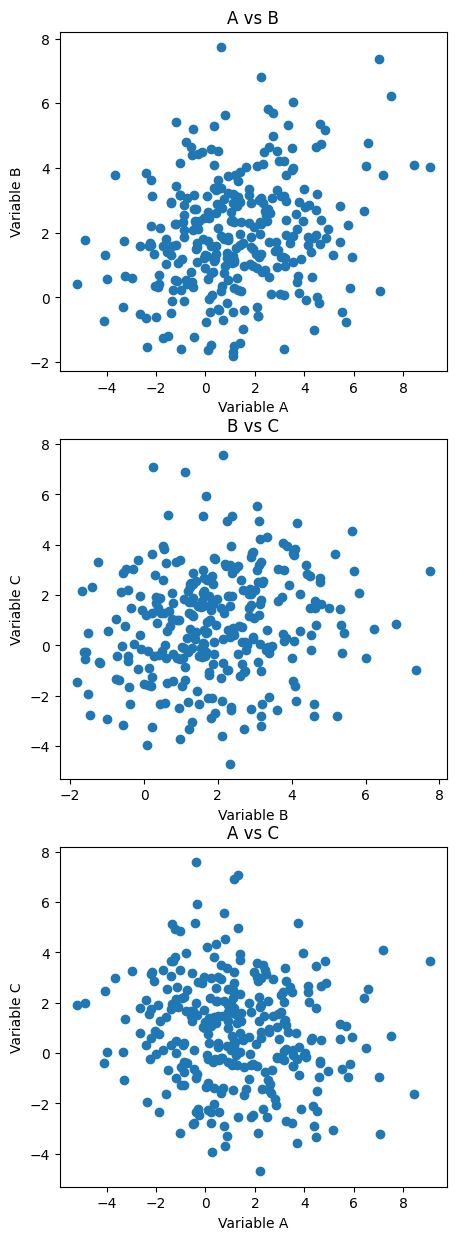

In [ ]:
#1 b:

#below is the plotting the scatter plots of a'c a'b b'c
fig , axy = plt.subplots(3,1 , figsize = (5,15))
axy[0].scatter(matrix_a[:,0],matrix_a[:,1])
axy[0].set_xlabel("Variable A")
axy[0].set_ylabel("Variable B")
axy[0].set_title("A vs B")



axy[1].scatter(matrix_a[:,1],matrix_a[:,2])
axy[1].set_xlabel("Variable B")
axy[1].set_ylabel("Variable C")
axy[1].set_title("B vs C")



axy[2].scatter(matrix_a[:,0],matrix_a[:,2])
axy[2].set_xlabel("Variable A")
axy[2].set_ylabel("Variable C")
axy[2].set_title("A vs C")


In [ ]:
#1 C:

#calculate the mean vector with numpy mean funciton on axis 0
mean_vector = np.mean(matrix_a, axis=0)
#calculate the covarience matrix of a by passing matrix of generated values and the row variable axis
covarience_matrix_a_after = np.cov(np.transpose(matrix_a), rowvar = True)

#print statements of the covarience and mean nparrays
print("covarience Matrix after: \n", covarience_matrix_a_after)
print("Mean Vector after: \n", mean_vector)

covarience Matrix after: 
 [[ 5.81268785  0.95779868 -0.66446011]
 [ 0.95779868  3.05198598  0.53077744]
 [-0.66446011  0.53077744  4.50647115]]
Mean Vector after: 
 [1.23391661 1.94366887 0.83785263]


In [ ]:
#1 D i: calculating Eucdlidean and Mahalanobis dists

#calculating the euclidean distance by taking the second norm of the matrix a - mean vector (spanned) on axis 1
eucd_dists = np.linalg.norm((matrix_a - mean_vector), ord = 2, axis = 1)


#print and create and empty vector of shape rows of a , 1
rows_a, columns_a = matrix_a.shape
maha_dists = np.zeros(shape=(rows_a,1))

#calculating the maha distance of every row from the subtracting the mean vector from each row then mulitpling by the inverse covarience matrix then the subtracted statement transpose
for i in range(rows_a):
  sub_a_mean = matrix_a[i,:] - mean_vector
  maha_dists[i] = np.matmul(np.matmul(sub_a_mean,  np.linalg.inv(covarience_matrix_a_after)), sub_a_mean.T)


Summary (below): it seems that the mahalabobis distance is if you fold a normal distrbution in half with zero being the 'mean'. While the eucd_dists seem to be a normal distribution with sekw on the right side.

Text(0.5, 0, 'Bins')

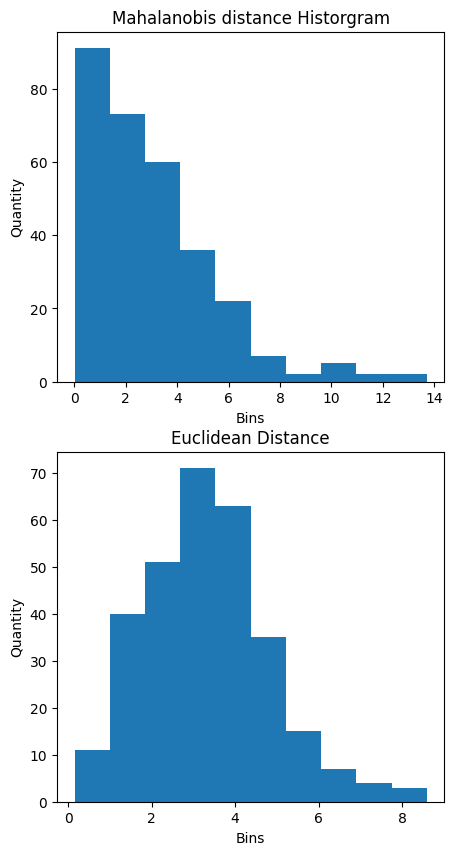

In [ ]:
#1 d ii: histograms

#print the mahana dists and euclidean distance on the histograms
fig , axy = plt.subplots(2,1 , figsize = (5,10))

axy[0].hist(maha_dists)
axy[0].set_title("Mahalanobis distance Historgram")
axy[0].set_ylabel("Quantity")
axy[0].set_xlabel("Bins")


axy[1].hist(eucd_dists)
axy[1].set_title("Euclidean Distance")
axy[1].set_ylabel("Quantity")
axy[1].set_xlabel("Bins")

In [ ]:
#2: import data from google drive

#import the data from greg's drive (if you try to run this the file path needs to be changed)
df = pd.read_excel('/content/drive/My Drive/HW Files/CSI5810/Wheat_Data.xlsx')

#print to verify the data was inputed correctly
print(df)

#dump the dataframe to a numpy array
wheat_matrix = df.to_numpy()

    feat1  feat2   feat3  feat4  feat5  feat6
0   15.26  14.84  0.8710  5.763  3.312  2.221
1   14.88  14.57  0.8811  5.554  3.333  1.018
2   14.29  14.09  0.9050  5.291  3.337  2.699
3   13.84  13.94  0.8955  5.324  3.379  2.259
4   16.14  14.99  0.9034  5.658  3.562  1.355
..    ...    ...     ...    ...    ...    ...
94  11.02  13.00  0.8189  5.325  2.701  6.735
95  11.55  13.10  0.8455  5.167  2.845  6.715
96  13.20  13.66  0.8883  5.236  3.232  8.315
97  16.23  15.18  0.8850  5.872  3.472  3.769
98  12.73  13.75  0.8458  5.412  2.882  3.533

[99 rows x 6 columns]


In [ ]:
#2: print the covarience and mean vectors of the wheat data

#calculate the means of each feats and store in nparray
mean_vector_wheat = np.mean(wheat_matrix, axis=0)

#calculate the covarience matrix of the 6 feats from the wheat data
covarience_wheat_matrix_after = np.cov(np.transpose(wheat_matrix), rowvar = True)

#print to verify
print("covarience Matrix after: \n", covarience_wheat_matrix_after)
print("Mean Vector after: \n", mean_vector_wheat)


covarience Matrix after: 
 [[ 8.42715358e+00  3.70745018e+00  4.71469812e-02  1.20302176e+00
   1.07124568e+00 -1.04401721e+00]
 [ 3.70745018e+00  1.65083861e+00  1.82197397e-02  5.47227340e-01
   4.59726908e-01 -4.21084983e-01]
 [ 4.71469812e-02  1.82197397e-02  6.53623793e-04  4.20635245e-03
   7.76299929e-03 -1.51840645e-02]
 [ 1.20302176e+00  5.47227340e-01  4.20635245e-03  1.93049037e-01
   1.40964564e-01 -1.00880631e-01]
 [ 1.07124568e+00  4.59726908e-01  7.76299929e-03  1.40964564e-01
   1.45691920e-01 -1.57661014e-01]
 [-1.04401721e+00 -4.21084983e-01 -1.51840645e-02 -1.00880631e-01
  -1.57661014e-01  2.48604609e+00]]
Mean Vector after: 
 [14.92929293 14.6259596   0.86787374  5.66632323  3.25224242  3.75321414]


In [ ]:
#3 i: create values to plot

#plug the covarience nparray into the linear alg eigen function to return the eigenvalues and eigenvectors
wheat_eigenvalues, wheat_eigenvectors = np.linalg.eig(covarience_wheat_matrix_after)

#store the top to wheat eigenvectors by returning the index of the best eigen values in the eigenvectors than taking those values from the transpose of the matrix
wheat_eigenvectors_transpose = np.transpose(wheat_eigenvectors)
top_2_eigenVectors = wheat_eigenvectors_transpose[(np.argsort(wheat_eigenvalues)[:2])]

print(top_2_eigenVectors, (np.argsort(wheat_eigenvalues)[:2]))
print(wheat_eigenvectors_transpose)
#caluclating the dot product by mulitpling the wheat matrix 2 best eigenvectors
dotprod_1_wheat = np.dot(wheat_matrix,wheat_eigenvectors_transpose[0])
print(dotprod_1_wheat.shape)
dotprod_2_wheat = np.dot(wheat_matrix,wheat_eigenvectors_transpose[1])



[[ 1.84717801e-02 -5.43283528e-02 -9.93377847e-01 -1.24806470e-02
   9.87361285e-02 -1.75691701e-03]
 [-3.14925553e-01  4.34136660e-01  5.16894051e-02  1.23063516e-01
   8.33384978e-01 -5.58460505e-04]] [5 4]
[[-8.92599669e-01 -3.93012494e-01 -5.01271339e-03 -1.27581025e-01
  -1.13324973e-01  1.40222738e-01]
 [-1.18933341e-01 -6.94533504e-02  3.42361955e-03 -3.83358300e-02
  -3.97756345e-03 -9.89714057e-01]
 [ 2.71164169e-01 -5.34238070e-01  8.89837743e-02 -6.41448298e-01
   4.69991617e-01  2.81695921e-02]
 [ 1.26772926e-01 -6.03225403e-01  5.07316253e-02  7.45316799e-01
   2.48938075e-01 -2.59703458e-03]
 [-3.14925553e-01  4.34136660e-01  5.16894051e-02  1.23063516e-01
   8.33384978e-01 -5.58460505e-04]
 [ 1.84717801e-02 -5.43283528e-02 -9.93377847e-01 -1.24806470e-02
   9.87361285e-02 -1.75691701e-03]]
(99,)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

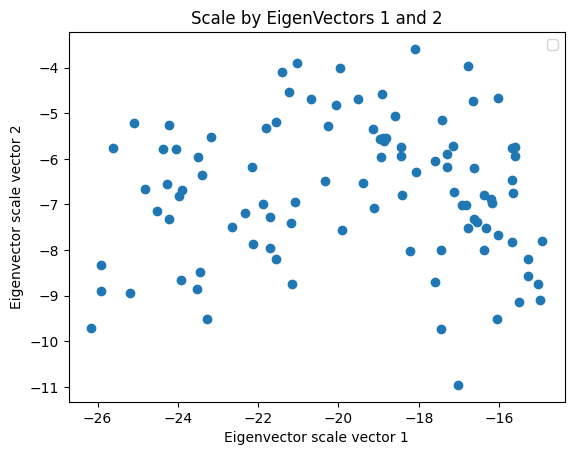

In [ ]:
#created as simple scatter plot
plt.scatter(dotprod_1_wheat, dotprod_2_wheat)
plt.title("Scale by EigenVectors 1 and 2")
plt.xlabel("Eigenvector scale vector 1")
plt.ylabel("Eigenvector scale vector 2")
plt.legend()
plt.plot

In [ ]:
#4 i: import data

#line in file where data stops
#lineseperator = 199522

#columns titles
#columns_titles= ['AAGE','ACLSWKR','ADTIND','ADTOCC','AGI','AHGA','AHRSPAY','AHSCOL','AMARITL','AMJIND','AMJOCC','ARACE','AREORGN','ASEX','AUNMEM','AUNTYPE','AWKSTAT','CAPGAIN','CAPLOSS','DIVVAL','FEDTAX','FILESTAT','GRINREG','GRINST','HHDFMX','HHDREL','MARSUPWT','MIGMTR1','MIGMTR3','MIGMTR4','MIGSAME','MIGSUN','NOEMP','PARENT','PEARNVAL','PEFNTVTY','PEMNTVTY','PENATVTY','PRCITSHP','PTOTVAL','SEOTR','Target']

#read in the data
data = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/census.tar.gz', compression="gzip", nrows = lineseperator)

#dump into numpy
pd_m = data.to_numpy()



        census-income.data                  Not in universe   0   0.1  \
0                       58   Self-employed-not incorporated   4    34   
1                       18                  Not in universe   0     0   
2                        9                  Not in universe   0     0   
3                       10                  Not in universe   0     0   
4                       48                          Private  40    10   
...                    ...                              ...  ..   ...   
199517                  87                  Not in universe   0     0   
199518                  65       Self-employed-incorporated  37     2   
199519                  47                  Not in universe   0     0   
199520                  16                  Not in universe   0     0   
199521                  32                          Private  42    30   

               High school graduate   0.2  Not in universe.1  \
0        Some college but no degree     0    Not in univers

In [ ]:
#4 ii:
#make legend
legend = []
x,y = pd_m.shape

#run a loop for all the attributes and append all the found unique values to a legend
for i in range(y):
  legend.append(np.unique(pd_m[:,i]))
  print(i, legend[i] ,'\n')


0 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90] 

1 [' Federal government' ' Local government' ' Never worked'
 ' Not in universe' ' Private' ' Self-employed-incorporated'
 ' Self-employed-not incorporated' ' State government' ' Without pay'] 

2 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51] 

3 [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46] 

4 [' 10th grade' ' 11th grade' ' 12th grade no diploma'
 ' 1st 2nd 3rd or 4th grade' ' 5th or 6th grade' ' 7th and 8th grade'
 ' 9th grade' ' Associates degree-academic program'
 ' Associates degree-occup /vocational' ' Bachelors degree(BA AB

In [ ]:
#reduce rows(aggregation) that seem redundent to categorizing the income

#after looking roughly at the attributes I picked the sets of data that seemed to have major diffrence
pd_2_attributes = ['age','grade','marriage Status','major industry code','major occupation code','race','sex','union participation','parential status','citizenship','Wealth thresehold']
pd_m_2 = pd_m[:,[0,4,7,8,9,10,12,13,31,35,41]]
legend2 = []

#recalculated the unique values (forgot I had already did this earlier in the code)
x,y = pd_m_2.shape
for i in range(y):
  legend2.append(np.unique(pd_m_2[:,i]))


In [ ]:
#create a seperate data set with the desired attributes with below $50000
pd_m_2_below = np.array(pd_m_2[np.where(pd_m_2[:,10]==" - 50000."),:]).T

#verify the nparray was populated with the correct values
print(pd_m_2_below.shape)

(11, 187140, 1)



Summary: When looking at the data below for the first time the header (ironically found in the middle of the file) tries to train a model to distinct between those that earn above and below $50000, without income data. Plotting the data on logorithmic histograms you can compare those that fall under 50000 and those above 50000 in other categories. Some of the listed feats shows relationships between those above 50000 and those below 50000, such as unions and citizenship. Being in a union and having citizenships shows that you have a correlation (not cause-ation) to having more people in you class to have +50000.


<ipython-input-17-2c0039d2b58c>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axy[j,i].set_xticklabels(axy[j,i].get_xticklabels(),rotation=25, ha='right')


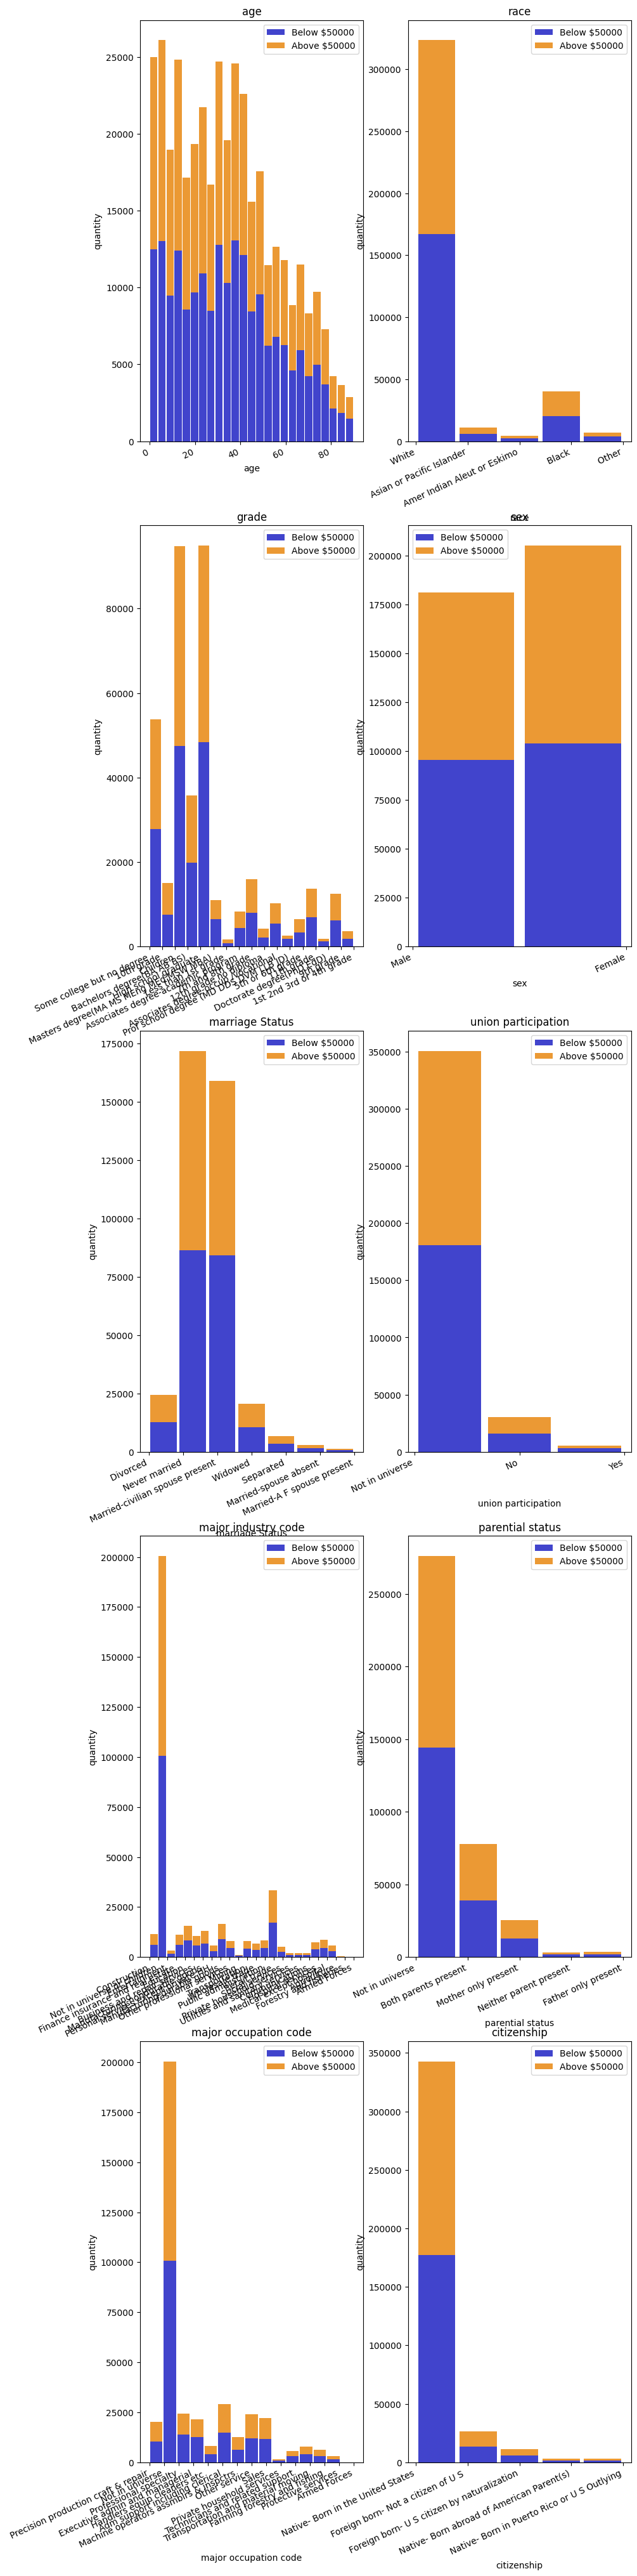

In [ ]:
#Histograms of each of the choosen categories from the 199522 data points
fig , axy = plt.subplots(5,2 , figsize = (10,50))

#counters i and j are used a cords for postioning the histograms while k is for the attribute value
i = 0
j = 0
k = 0


for j in range(5):
  for i in range(2):
    k = i*5+j
    #set the quantity of bins per attribute to all the unique values unless the bin count exceeds 24
    bins_axy = len(legend2[k])
    if bins_axy > 25:
      bins_axy = 25

    #create a stacked historgram with the values
    axy[j,i].hist([pd_m_2[:,k],pd_m_2_below[k,:,0]], color=['#4144cc','#eb9934'], bins = bins_axy,stacked = True,rwidth = .9)
    axy[j,i].set_xticklabels(axy[j,i].get_xticklabels(),rotation=25, ha='right')
    axy[j,i].set_xlabel(pd_2_attributes[k])
    axy[j,i].set_ylabel("quantity")
    axy[j,i].set_title(pd_2_attributes[k])
    axy[j,i].legend(["Below $50000", "Above $50000"])
